# Khám phá dữ liệu

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import os

In [54]:
# Load the dataset
data = pd.read_csv('../data/raw/diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Tổng quan dữ liệu

In [55]:
# Explore the dataset
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Quan sát:
    - Không có giá trị null. 
    - Unamed: cột đánh số thứ tự => xóa
    - x, y, z có min là 0 => cần xử lý trước nếu có chia

In [56]:
data = data.drop(columns=['Unnamed: 0'])

In [57]:
data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [58]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [59]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

## Phân bố giá

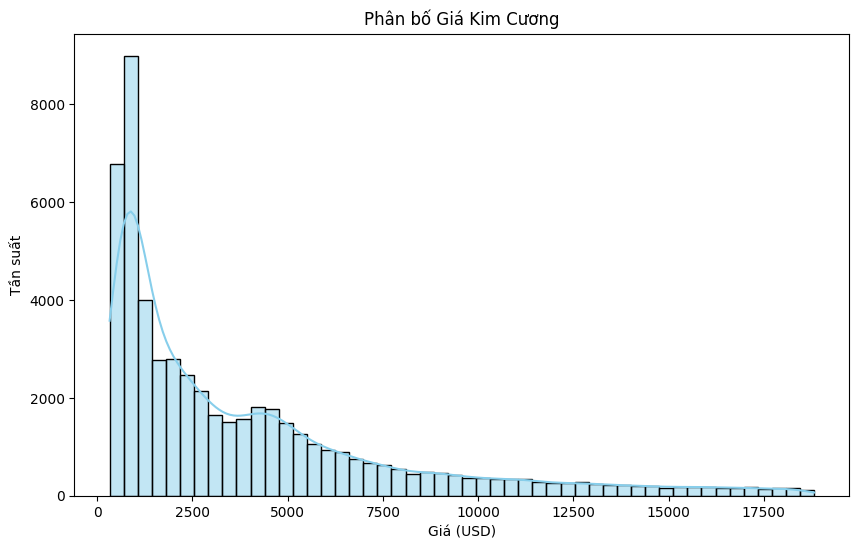

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=50, color='skyblue', edgecolor='black')
plt.title('Phân bố Giá Kim Cương')
plt.xlabel('Giá (USD)')
plt.ylabel('Tần suất')
plt.show()

## Phân bố các biến

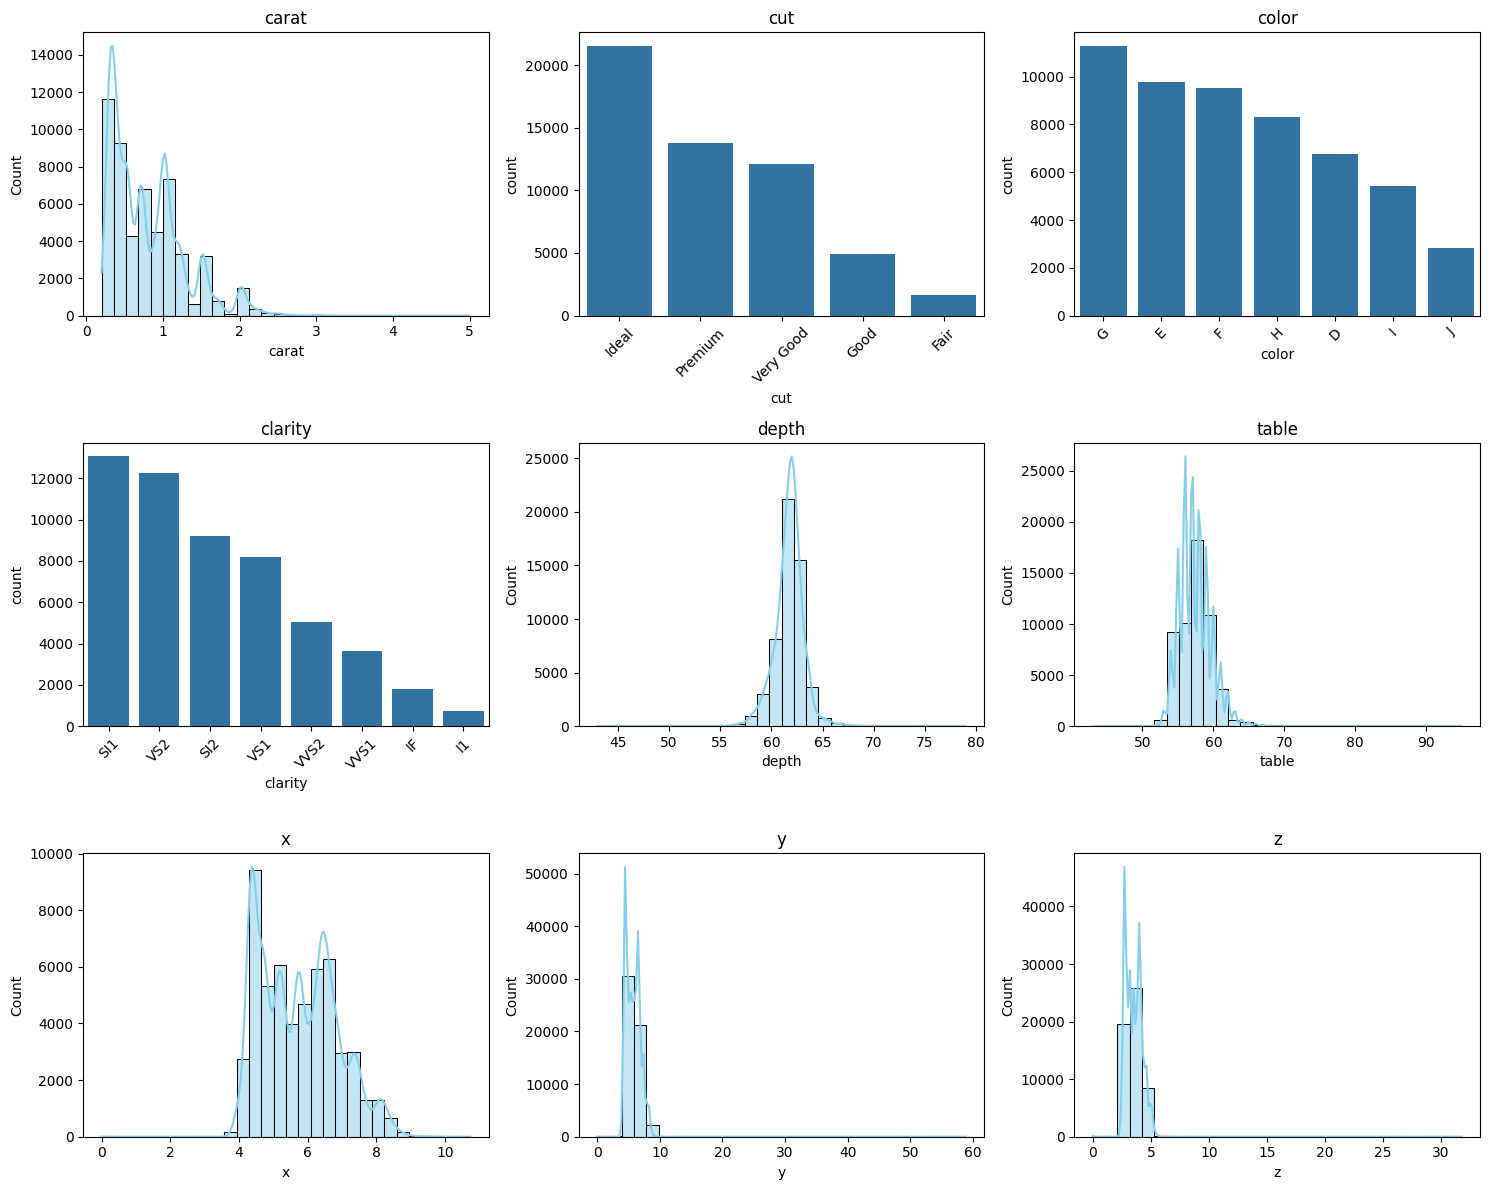

In [61]:
rows = 3
plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(features, 1):
    plt.subplot(rows, 3, i)
    if data[col].dtype == 'object':
        sns.countplot(data=data, x=col, order=data[col].value_counts().index)
        plt.xticks(rotation=45)
    else:
        sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

## Mối quan hệ giữa đặc trưng và giá

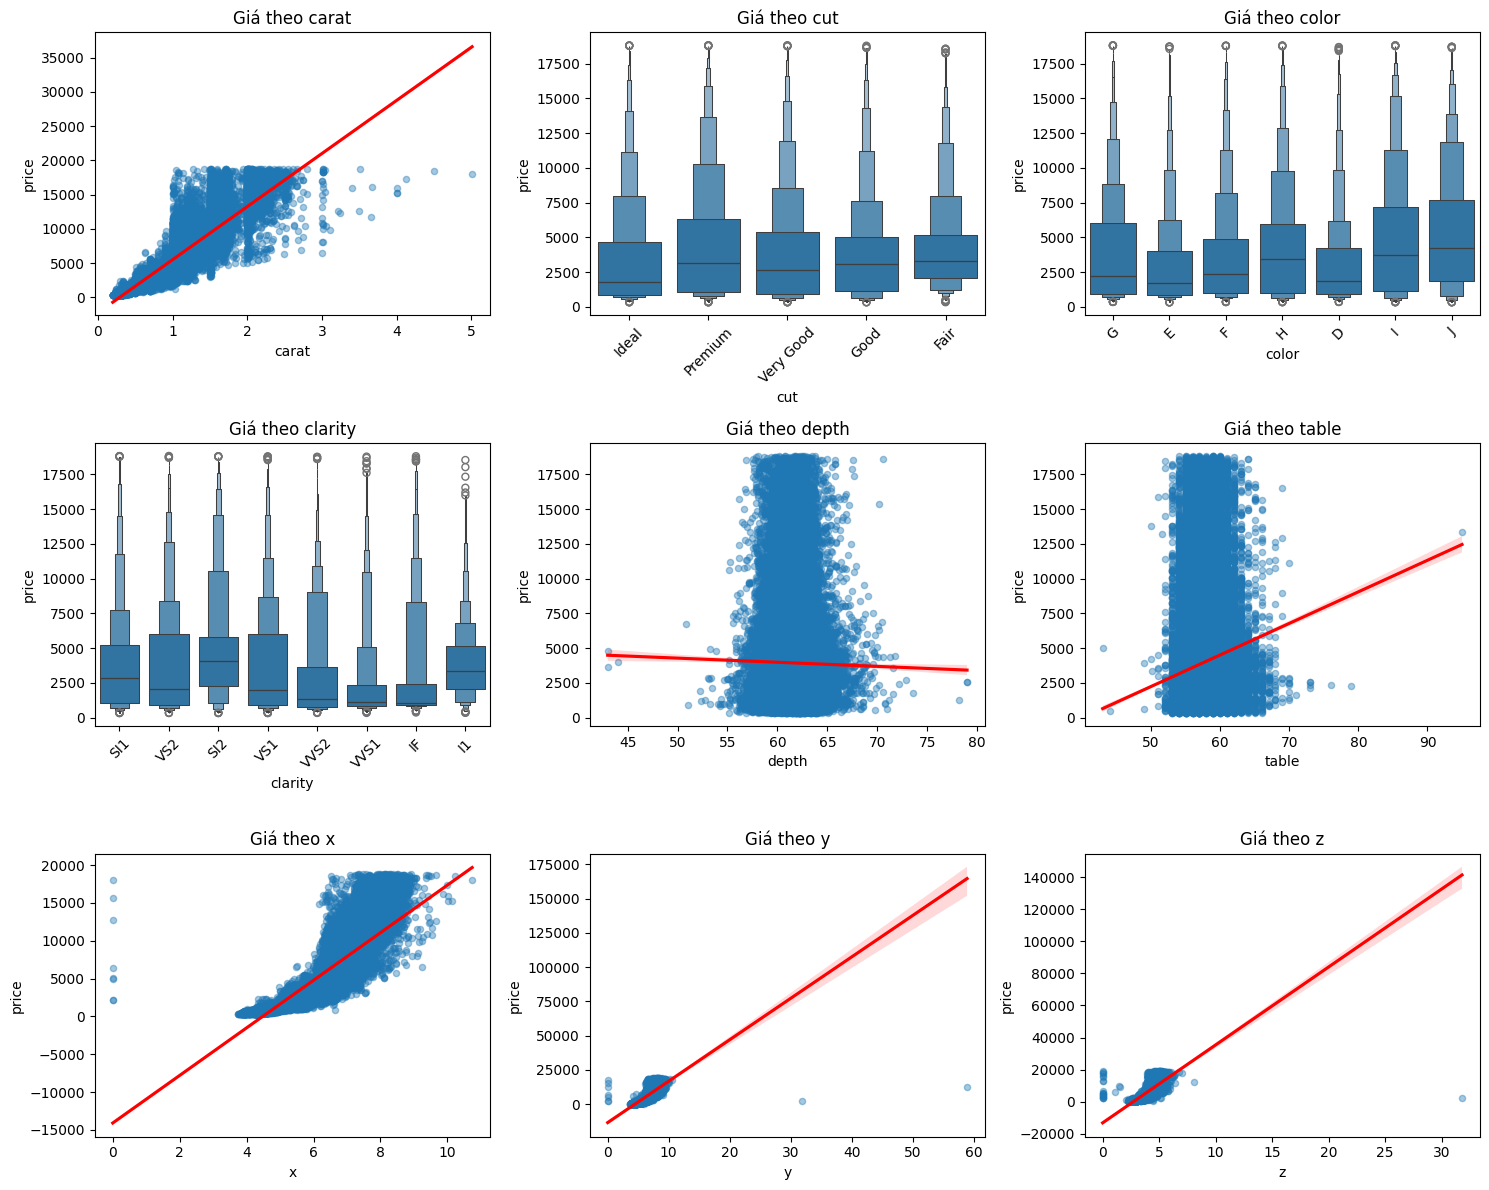

In [62]:
plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(features, 1):
    plt.subplot(rows, 3, i)
    if data[col].dtype == 'object':
        sns.boxenplot(data=data, x=col, y='price', order=data[col].value_counts().index)
        plt.xticks(rotation=45)
    else:
        sns.regplot(data=data, x=col, y='price', scatter_kws={'alpha':0.4, 's':20}, line_kws={'color':'red'})
    plt.title(f'Giá theo {col}')
plt.tight_layout()
plt.show()


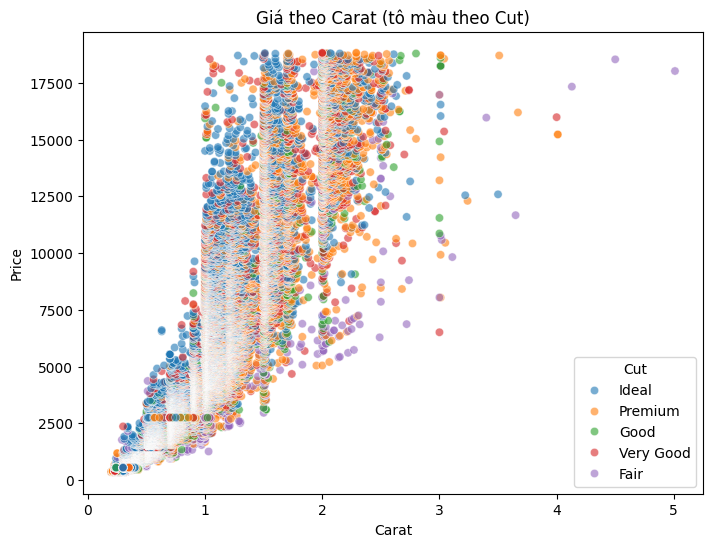

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x='carat',
    y='price',
    hue='cut',
    alpha=0.6
)

plt.title('Giá theo Carat (tô màu theo Cut)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cut')
plt.show()

## Ma trận tương quan

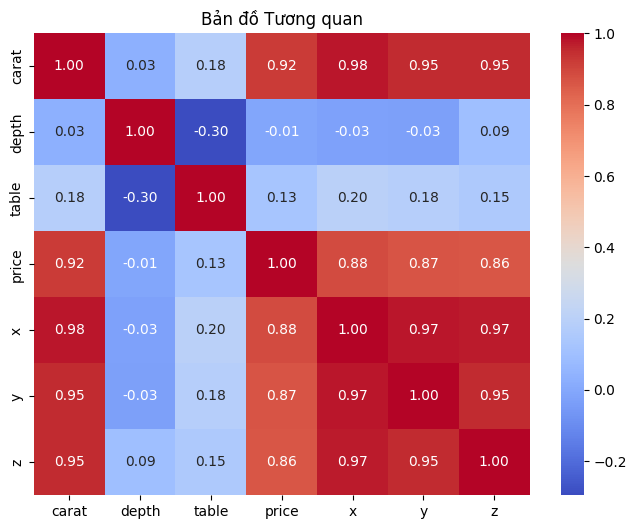

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data.select_dtypes(include=np.number).corr(),
    annot=True, cmap='coolwarm', fmt='.2f'
)
plt.title('Bản đồ Tương quan')
plt.show()

## Data cleaning

In [65]:
text_cols = ['cut', 'color', 'clarity']

# Chuẩn hóa text ở các cột phân loại
for col in text_cols:
    data[col] = data[col].astype(str).str.strip().str.upper()

# Kiểm tra và loại bỏ giá trị trùng lặp
before = data.shape[0]
data.drop_duplicates(inplace=True)
after = data.shape[0]
print(f"Đã xóa {before - after} dòng trùng lặp.")

# Kiểm tra và xử lý giá trị thiếu (nếu có)
missing = data.isnull().sum()
print("\nSố lượng giá trị thiếu mỗi cột:")
print(missing)

# Nếu có thể bỏ NA an toàn:
data.dropna(inplace=True)

# 🔹 Loại bỏ các hàng có x, y, z = 0
before = data.shape[0]
data = data[(data['x'] > 0) & (data['y'] > 0) & (data['z'] > 0)]
after = data.shape[0]
print(f"\nĐã loại {before - after} hàng có x, y hoặc z bằng 0.")

# Kiểm tra và loại bỏ các outliers cơ bản (ví dụ theo IQR)
num_cols = data.select_dtypes(include='number').columns

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    before = len(data)
    data = data[(data[col] >= lower) & (data[col] <= upper)]
    after = len(data)
    print(f"{col}: loại {before - after} giá trị ngoại lai.")

# Kiểm tra lại dữ liệu sau cleaning
print("\nKích thước dữ liệu sau cleaning:", data.shape)
print(data.describe())

# Lưu lại dữ liệu đã làm sạch
clean_path = "../data/processed/diamonds_clean.csv"
data.to_csv(clean_path, index=False)
print(f"\nĐã lưu dữ liệu đã làm sạch tại: {clean_path}")

Đã xóa 146 dòng trùng lặp.

Số lượng giá trị thiếu mỗi cột:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Đã loại 19 hàng có x, y hoặc z bằng 0.
carat: loại 1867 giá trị ngoại lai.
depth: loại 2777 giá trị ngoại lai.
table: loại 342 giá trị ngoại lai.
price: loại 2361 giá trị ngoại lai.
x: loại 0 giá trị ngoại lai.
y: loại 1 giá trị ngoại lai.
z: loại 2 giá trị ngoại lai.

Kích thước dữ liệu sau cleaning: (46425, 10)
              carat         depth         table         price             x  \
count  46425.000000  46425.000000  46425.000000  46425.000000  46425.000000   
mean       0.698218     61.803673     57.239968   3001.342768      5.522105   
std        0.361951      1.077656      2.013965   2599.798006      0.964303   
min        0.200000     59.000000     52.000000    326.000000      3.730000   
25%        0.370000     61.200000     56.000000    881.000000      4.630000   
50%    